## Determinar demanda mensual para proyectar inventario

Tabla Resumen 

                Objetivo: Determinar demanda mensual para proyectar inventario

In [2]:
import pandas as pd

In [3]:
dt_detalles = pd.read_csv('C:/Users/sagua/OneDrive/Escritorio/DATA HENRY/Proyecto Final/Versiones/v3/detalles_compras_limpio.csv') 
dt_detalles.head()

,CompraDetalle_ID,Inventario_ID,Tienda_ID,Producto_ID,Nombre_Producto,Tamaño,Proveedor_ID,Nombre_Proveedor,Compra_ID,Fecha_Compra,Fecha_Ingreso,Fecha_Factura,Fecha_Pago,Costo_Unitario,Cantidad,Costo_Total,Clasificacion
0,PO_0001,69_MOUNTMEND_8412,69,8412,TEQUILA OCHO PLATA FRESNO,750ML,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,PO_0002,30_CULCHETH_5255,30,5255,TGI FRIDAYS ULTIMTE MUDSLIDE,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,PO_0003,34_PITMERDEN_5215,34,5215,TGI FRIDAYS LONG ISLAND ICED,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,PO_0004,1_HARDERSFIELD_5255,1,5255,TGI FRIDAYS ULTIMTE MUDSLIDE,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,PO_0005,76_DONCASTER_2034,76,2034,GLENDALOUGH DOUBLE BARREL,750ML,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [4]:
dt_inventario = pd.read_csv('C:/Users/sagua/OneDrive/Escritorio/DATA HENRY/Proyecto Final/Versiones/v3/Inventario_Gral.csv') 
dt_inventario.head()

,Inventario_ID,Tienda_ID,Ciudad,Producto_ID,Nombre_Producto,Tamaño,Existencia_Inicial,Existencia_Final,Precio_Venta_Inicial,Precio_Venta_Final,Fecha_Cierre
0,10_HORNSEY_1000,10,HORNSEY,1000,GOSLINGS DARK'N STORMY VAP,750ML,1.0,0.0,14.99,0.00,2016-12-31
1,10_HORNSEY_1001,10,HORNSEY,1001,BAILEYS 50ML 4 PACK,50ML 4 PK,11.0,0.0,5.99,5.99,2016-12-31
2,10_HORNSEY_1003,10,HORNSEY,1003,CROWN ROYAL VAP GLASS+COASTR,750ML,0.0,73.0,0.00,22.99,2016-12-31
3,10_HORNSEY_1005,10,HORNSEY,1005,MAKER'S MARK COMBO PACK,375ML 2 PK,18.0,0.0,34.99,0.00,2016-12-31
4,10_HORNSEY_10058,10,HORNSEY,10058,F COPPOLA DMD IVRY CAB SVGN,750ML,52.0,24.0,14.99,14.99,2016-12-31


In [5]:
inventario_por_producto = dt_inventario.groupby(['Producto_ID', 'Nombre_Producto', 'Tamaño'], as_index=False).agg({
    'Existencia_Inicial': 'sum',
    'Existencia_Final': 'sum',
    'Precio_Venta_Inicial': 'mean',
    'Precio_Venta_Final': 'mean'
})
inventario_por_producto.head()

,Producto_ID,Nombre_Producto,Tamaño,Existencia_Inicial,Existencia_Final,Precio_Venta_Inicial,Precio_Venta_Final
0,58,GEKKEIKAN BLACK & GOLD SAKE,750ML,281.0,385.0,10.825000,12.680714
1,60,CANADIAN CLUB 1858 VAP,750ML,288.0,146.0,10.025965,3.084912
2,61,MARGARITAVILLE SILVER,750ML,12.0,12.0,13.990000,13.990000
3,62,HERRADURA SILVER TEQUILA,750ML,384.0,459.0,35.990270,36.490135
4,63,HERRADURA REPOSADO TEQUILA,750ML,365.0,442.0,36.823889,37.906944


In [6]:
inventario_por_producto['Precio_Venta_Inicial'] = inventario_por_producto['Precio_Venta_Inicial'].round(2)
inventario_por_producto['Precio_Venta_Final'] = inventario_por_producto['Precio_Venta_Final'].round(2)
inventario_por_producto.head()

,Producto_ID,Nombre_Producto,Tamaño,Existencia_Inicial,Existencia_Final,Precio_Venta_Inicial,Precio_Venta_Final
0,58,GEKKEIKAN BLACK & GOLD SAKE,750ML,281.0,385.0,10.82,12.68
1,60,CANADIAN CLUB 1858 VAP,750ML,288.0,146.0,10.03,3.08
2,61,MARGARITAVILLE SILVER,750ML,12.0,12.0,13.99,13.99
3,62,HERRADURA SILVER TEQUILA,750ML,384.0,459.0,35.99,36.49
4,63,HERRADURA REPOSADO TEQUILA,750ML,365.0,442.0,36.82,37.91


Se consolidan las compras anuales por producto sin distinguir entre tiendas físicas, con el fin de modelar la demanda total para el canal e-commerce, que requiere una planificación centralizada del stock.

In [7]:
compras_resumen = dt_detalles.groupby('Producto_ID')['Cantidad'].sum().reset_index()
compras_resumen.rename(columns={'Cantidad': 'Compras_Año'}, inplace=True)

Seleccionando las columnas de Existencia Inicial y FInal para generar el rsumen

In [8]:
inventario_reducido = dt_inventario.groupby(['Producto_ID', 'Nombre_Producto'], as_index=False).agg({
    'Existencia_Inicial': 'sum',
    'Existencia_Final': 'sum'
})


In [9]:
resumen = inventario_reducido.merge(compras_resumen, on='Producto_ID', how='left')

Rellenar posibles compras nulas con 0

In [10]:
resumen['Compras_Año'] = resumen['Compras_Año'].fillna(0)


Calculo de la Demanda Estimada

In [11]:
resumen['Demanda_Estimada'] = resumen['Existencia_Inicial'] + resumen['Compras_Año'] - resumen['Existencia_Final']
resumen.head()

,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada
0,58,GEKKEIKAN BLACK & GOLD SAKE,281.0,385.0,3550.0,3446.0
1,60,CANADIAN CLUB 1858 VAP,288.0,146.0,1633.0,1775.0
2,61,MARGARITAVILLE SILVER,12.0,12.0,312.0,312.0
3,62,HERRADURA SILVER TEQUILA,384.0,459.0,3200.0,3125.0
4,63,HERRADURA REPOSADO TEQUILA,365.0,442.0,2855.0,2778.0


## Demanda promedio mensual y su desviación estándar

        Como no se tienen ventas registradas para todo el año, asumiremos una demanda uniforme para estimar la variación mensual, más adelante si la tienda proporciona nuevos datos podríamos afinarlo 

Calculo de la demanda mensual promedio

In [12]:
resumen['Demanda_Mensual_Promedio'] = resumen['Demanda_Estimada'] / 12

# Asumimos una desviación estándar aproximada del 25% de la demanda mensual, esto se puede reemplazar si después modelamos con datos reales
resumen['Desviacion_Estandar'] = resumen['Demanda_Mensual_Promedio'] * 0.25

Calculo de Stock de Seguridad y Stock Óptimo

        Se utilizó un nivel de servicio del 95% para garantizar una alta disponibilidad de productos en el canal e-commerce, minimizando quiebres de stock sin incurrir en costos excesivos por sobreabastecimiento. El valor Z=1.65 representa el punto de corte de la distribución normal estándar para este nivel de servicio, y se aplica como multiplicador de la desviación estándar estimada de la demanda mensual.

In [13]:
# Nivel de servicio Z (95%)
z = 1.65

# Stock de Seguridad
resumen['Stock_Seguridad'] = z * resumen['Desviacion_Estandar']

# Stock Óptimo Mensual (demanda promedio + stock de seguridad)
resumen['Stock_Optimo_Mensual'] = resumen['Demanda_Mensual_Promedio'] + resumen['Stock_Seguridad']

resumen.head()

,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,Stock_Optimo_Mensual
0,58,GEKKEIKAN BLACK & GOLD SAKE,281.0,385.0,3550.0,3446.0,287.166667,71.791667,118.456250,405.622917
1,60,CANADIAN CLUB 1858 VAP,288.0,146.0,1633.0,1775.0,147.916667,36.979167,61.015625,208.932292
2,61,MARGARITAVILLE SILVER,12.0,12.0,312.0,312.0,26.000000,6.500000,10.725000,36.725000
3,62,HERRADURA SILVER TEQUILA,384.0,459.0,3200.0,3125.0,260.416667,65.104167,107.421875,367.838542
4,63,HERRADURA REPOSADO TEQUILA,365.0,442.0,2855.0,2778.0,231.500000,57.875000,95.493750,326.993750


        Debido a que los productos se gestionan como piezas (inidades no divisibles), todos los valores calculados relacionados con demanda, stock de seguridad y stock óptimo mensual se redondean al número entero más cercano. Esto asegura una planificación realista y ejecutable para el equipo de logística y compras.

In [14]:
columnas_a_redondear = ['Demanda_Estimada', 'Demanda_Mensual_Promedio','Desviacion_Estandar', 'Stock_Seguridad', 'Stock_Optimo_Mensual']
resumen[columnas_a_redondear] = resumen[columnas_a_redondear].round().astype(int)
resumen.head()

,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,Stock_Optimo_Mensual
0,58,GEKKEIKAN BLACK & GOLD SAKE,281.0,385.0,3550.0,3446,287,72,118,406
1,60,CANADIAN CLUB 1858 VAP,288.0,146.0,1633.0,1775,148,37,61,209
2,61,MARGARITAVILLE SILVER,12.0,12.0,312.0,312,26,6,11,37
3,62,HERRADURA SILVER TEQUILA,384.0,459.0,3200.0,3125,260,65,107,368
4,63,HERRADURA REPOSADO TEQUILA,365.0,442.0,2855.0,2778,232,58,95,327


## Productos con demanda nula o muy baja

        Eliminar del análisis aquellos productos que no tuvieron movimiento significativo durante el año, ya que no requieren planificación activa de inventario o podrían tratarse de errores de registro.

Productos con demanda estimada menor a 0

In [15]:
resumen_filtrado = resumen[resumen['Demanda_Estimada'] > 0].copy()
resumen_filtrado.head()

,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,Stock_Optimo_Mensual
0,58,GEKKEIKAN BLACK & GOLD SAKE,281.0,385.0,3550.0,3446,287,72,118,406
1,60,CANADIAN CLUB 1858 VAP,288.0,146.0,1633.0,1775,148,37,61,209
2,61,MARGARITAVILLE SILVER,12.0,12.0,312.0,312,26,6,11,37
3,62,HERRADURA SILVER TEQUILA,384.0,459.0,3200.0,3125,260,65,107,368
4,63,HERRADURA REPOSADO TEQUILA,365.0,442.0,2855.0,2778,232,58,95,327


Productos críticos o de alta rotación

        Identificar gráficamente los productos con mayor demanda estimada, para priorizar su control y planeación dentro del inventario de la tienda virtual.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = resumen_filtrado.groupby('Nombre_Producto')['Demanda_Estimada'].sum().sort_values(ascending=False).head(10)
top10.head()

Nombre_Producto
SMIRNOFF 80 PROOF          477926
CAPT MORGAN SPICED RUM     385838
TITO'S HANDMADE VODKA      358288
ABSOLUT 80 PROOF           341297
JACK DANIELS NO 7 BLACK    334824
Name: Demanda_Estimada, dtype: int64

Se genera una visualización de los 10 productos con mayor demanda estimada durante el año, permitiendo identificar los ítems de mayor rotación.

C:\Users\sagua\AppData\Local\Temp\ipykernel_10680\3787450704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


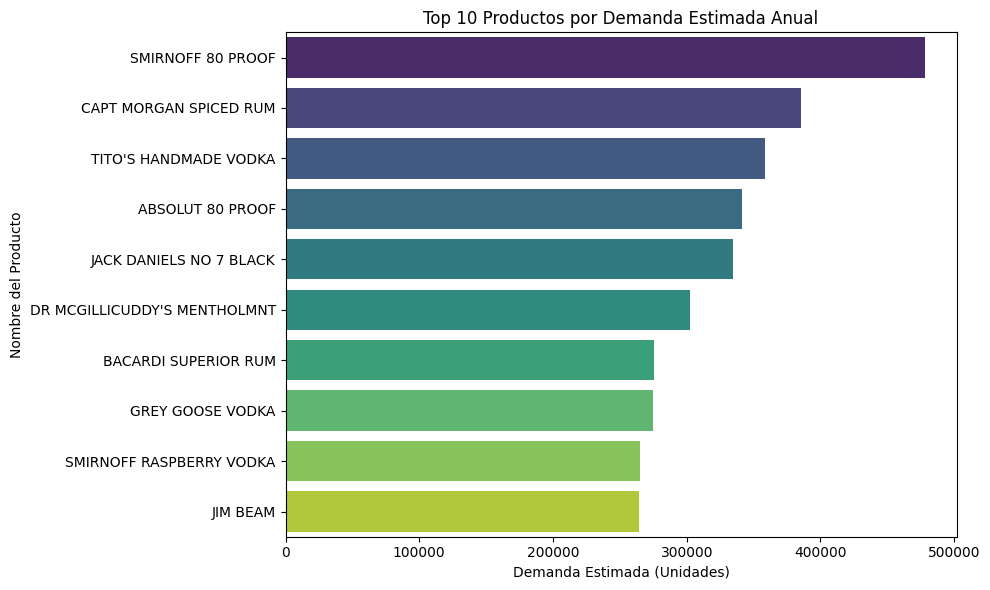

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Productos por Demanda Estimada Anual')
plt.xlabel('Demanda Estimada (Unidades)')
plt.ylabel('Nombre del Producto')
plt.tight_layout()
plt.show()

In [18]:
import numpy as np


 Comparación Existencia Inicial vs. Final por producto

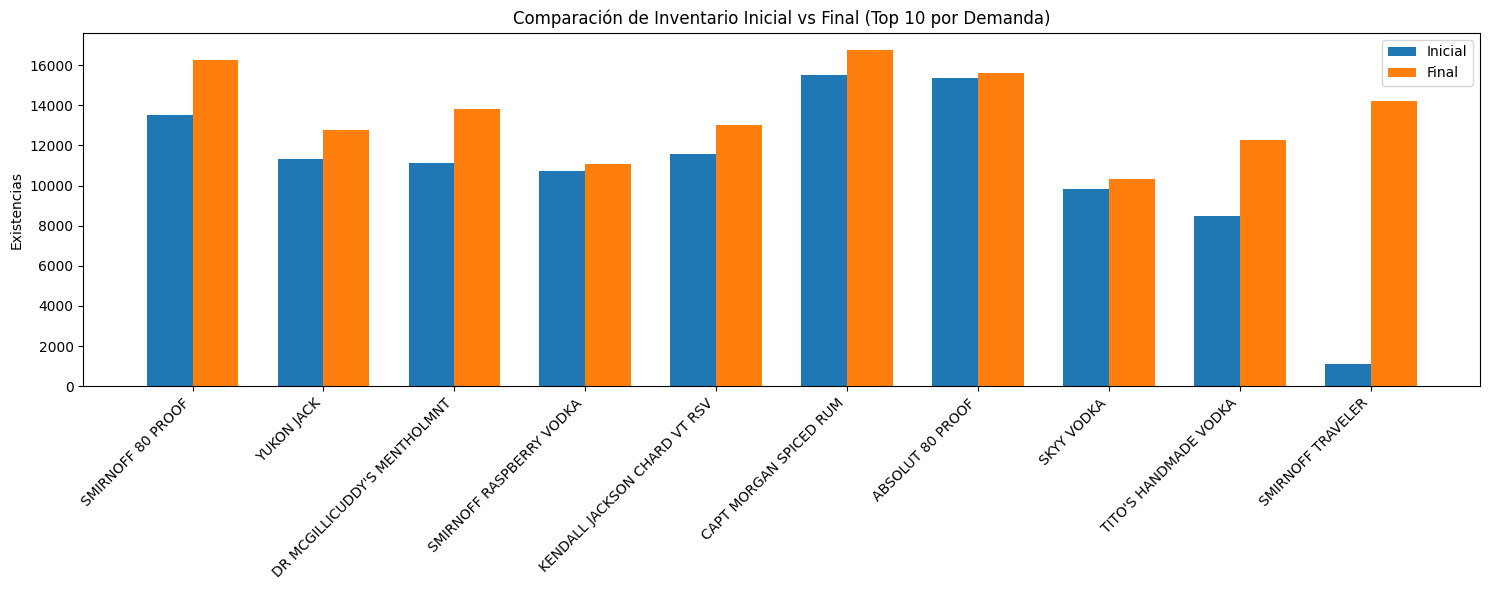

In [19]:
sample = resumen.sort_values(by='Demanda_Estimada', ascending=False).head(10)

x = np.arange(len(sample))
width = 0.35

plt.figure(figsize=(15, 6))
plt.bar(x - width/2, sample['Existencia_Inicial'], width, label='Inicial')
plt.bar(x + width/2, sample['Existencia_Final'], width, label='Final')
plt.xticks(x, sample['Nombre_Producto'], rotation=45, ha='right')
plt.title('Comparación de Inventario Inicial vs Final (Top 10 por Demanda)')
plt.ylabel('Existencias')
plt.legend()
plt.tight_layout()
plt.show()


Distribución general de la demanda estimada

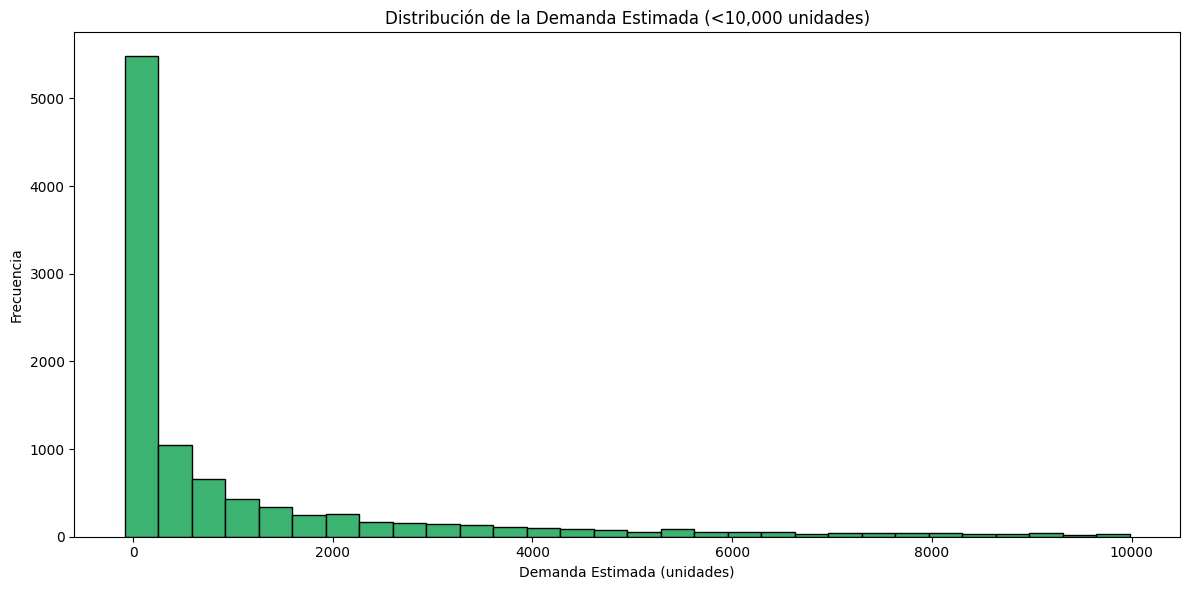

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(resumen[resumen['Demanda_Estimada'] < 10000]['Demanda_Estimada'], 
         bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de la Demanda Estimada (<10,000 unidades)')
plt.xlabel('Demanda Estimada (unidades)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


c:\Users\sagua\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


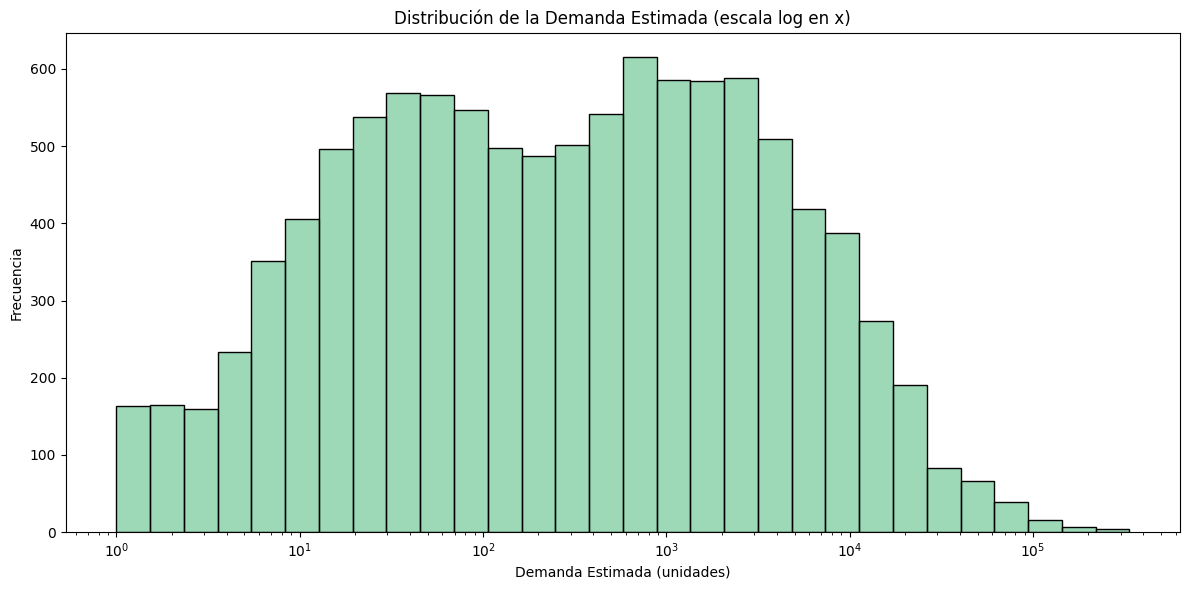

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(resumen['Demanda_Estimada'], bins=30, color='mediumseagreen', kde=True, log_scale=(True, False))
plt.title('Distribución de la Demanda Estimada (escala log en x)')
plt.xlabel('Demanda Estimada (unidades)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## Costo // Utilidad

        Se integró la información de costos y precios de venta para analizar la rentabilidad de cada producto en función de su demanda estimada. Esto permitió identificar los productos con mayor utilidad proyectada, así como oportunidades para optimizar la mezcla de inventario en función de su impacto económico.



In [22]:
df_productos = pd.read_csv('C:/Users/sagua/OneDrive/Escritorio/DATA HENRY/Proyecto Final/Versiones/v3/productos_Limpio.csv')
df_productos.head()



,Producto_ID,Nombre_Producto,Precio_Venta,Tamaño,Volumen,Clasificacion,Costo_Unitario,Proveedor_ID,Nombre_Proveedor
0,58,GEKKEIKAN BLACK & GOLD SAKE,12.99,750ML,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,HERRADURA SILVER TEQUILA,36.99,750ML,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,HERRADURA REPOSADO TEQUILA,38.99,750ML,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,NO. 3 LONDON DRY GIN,34.99,750ML,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,THREE OLIVES TOMATO VODKA,14.99,750ML,750,1,10.94,7245,PROXIMO SPIRITS INC


Resumen Enriquecido con datos de los productos para calculo de costos y utilidad

In [23]:
df_productos = df_productos[['Producto_ID', 'Precio_Venta', 'Costo_Unitario', 'Clasificacion']]
resumen_enriquecido = resumen_filtrado.merge(df_productos, on='Producto_ID', how='left')

Calculo de utilidad unitaria y total

In [24]:
resumen_enriquecido['Utilidad_Unit'] = resumen_enriquecido['Precio_Venta'] - resumen_enriquecido['Costo_Unitario']

resumen_enriquecido['Utilidad_Total'] = resumen_enriquecido['Demanda_Estimada'] * resumen_enriquecido['Utilidad_Unit']

Top productos por utilidad total estimada

C:\Users\sagua\AppData\Local\Temp\ipykernel_10680\3426400424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_utilidad.values, y=top_utilidad.index, palette='crest')


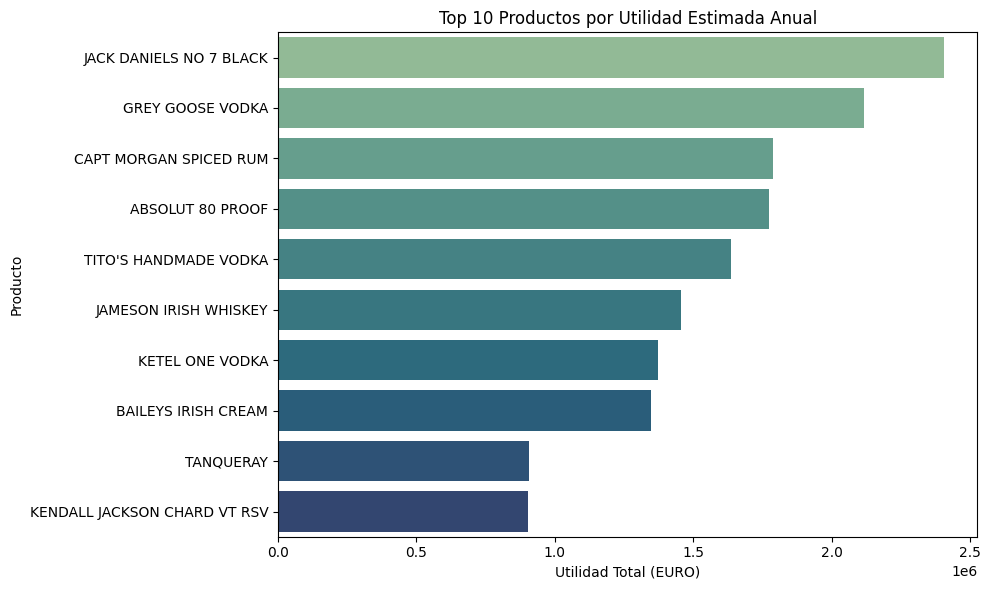

In [25]:
top_utilidad = resumen_enriquecido.groupby('Nombre_Producto')['Utilidad_Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_utilidad.values, y=top_utilidad.index, palette='crest')
plt.title('Top 10 Productos por Utilidad Estimada Anual')
plt.xlabel('Utilidad Total (EURO)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


Relación entre costo y utilidad total

In [26]:
print(resumen_enriquecido[['Costo_Unitario', 'Utilidad_Total', 'Clasificacion']].isnull().sum())


Costo_Unitario    0
Utilidad_Total    0
Clasificacion     0
dtype: int64


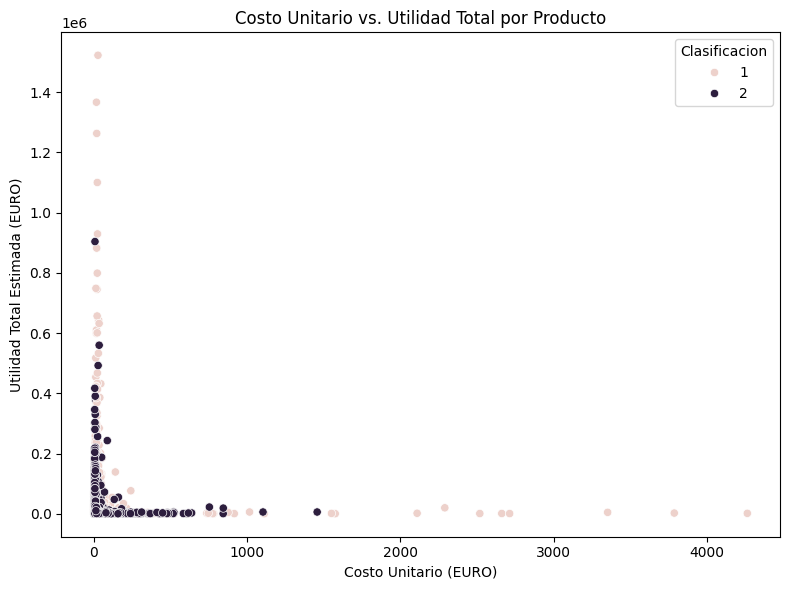

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resumen_enriquecido, x='Costo_Unitario', y='Utilidad_Total', hue='Clasificacion')
plt.title('Costo Unitario vs. Utilidad Total por Producto')
plt.xlabel('Costo Unitario (EURO)')
plt.ylabel('Utilidad Total Estimada (EURO)')
plt.tight_layout()
plt.show()


        El análisis muestra que la mayoría de los productos con mayor rentabilidad total pertenecen al segmento de bajo costo unitario, lo cual sugiere una estrategia centrada en volumen y eficiencia operativa. Por el contrario, productos de alto costo unitario no están contribuyendo significativamente a la utilidad total, por lo que deben ser reevaluados en términos de rotación, precio o incluso permanencia en el catálogo de productos 

## Implementacion de la IA

Segmentación ABC

In [28]:
# Paso 1: Ordenar por Utilidad Total descendente
resumen_enriquecido = resumen_enriquecido.sort_values(by='Utilidad_Total', ascending=False)

# Paso 2: Calcular el porcentaje de contribución
resumen_enriquecido['Porcentaje_Utilidad'] = resumen_enriquecido['Utilidad_Total'] / resumen_enriquecido['Utilidad_Total'].sum()

# Paso 3: Calcular el acumulado del porcentaje
resumen_enriquecido['Porcentaje_Acumulado'] = resumen_enriquecido['Porcentaje_Utilidad'].cumsum()

# Paso 4: Clasificar en A, B o C según regla 80/15/5
def clasificar_abc(porcentaje):
    if porcentaje <= 0.80:
        return 'A'
    elif porcentaje <= 0.95:
        return 'B'
    else:
        return 'C'

resumen_enriquecido['Clasificacion_ABC'] = resumen_enriquecido['Porcentaje_Acumulado'].apply(clasificar_abc)


In [29]:
print(resumen_enriquecido['Clasificacion_ABC'].value_counts())


Clasificacion_ABC
C    6807
B    2116
A    1667
Name: count, dtype: int64


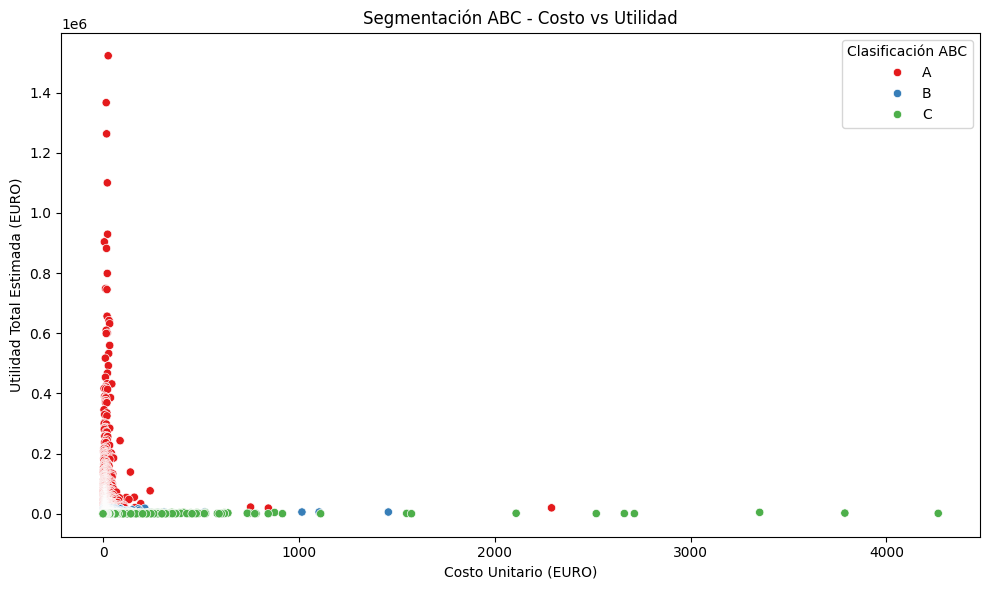

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resumen_enriquecido, x='Costo_Unitario', y='Utilidad_Total', hue='Clasificacion_ABC', palette='Set1')
plt.title('Segmentación ABC - Costo vs Utilidad')
plt.xlabel('Costo Unitario (EURO)')
plt.ylabel('Utilidad Total Estimada (EURO)')
plt.legend(title='Clasificación ABC')
plt.tight_layout()
plt.show()


-- Priorizar productos A para stock, precios agresivos, promociones.

-- Tener control sobre los productos B, mantenerlos saludables.

-- Evaluar productos C para:

        descontinuar

        cambiar su estrategia

        convertir en venta cruzada



Matriz de Prioridad: Alta demanda / Alta utilidad

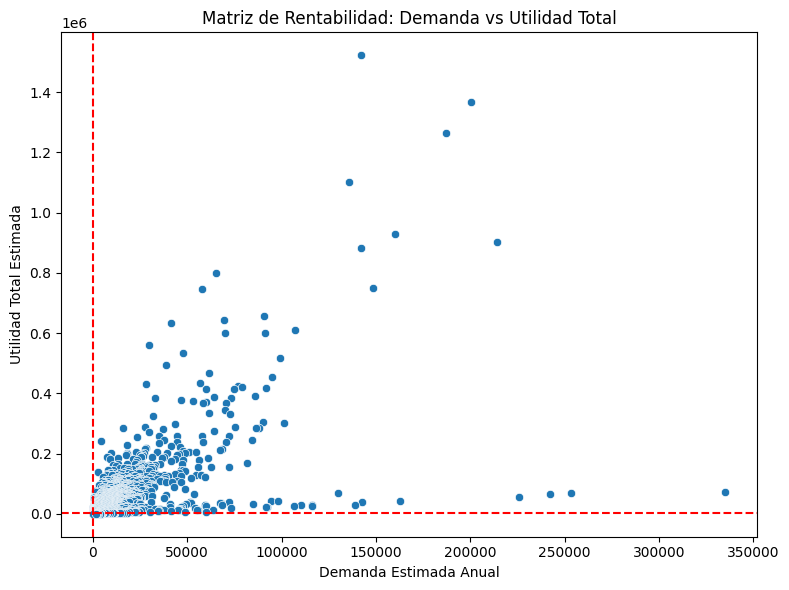

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=resumen_enriquecido, x='Demanda_Estimada', y='Utilidad_Total')
plt.axvline(resumen_enriquecido['Demanda_Estimada'].median(), color='red', linestyle='--')
plt.axhline(resumen_enriquecido['Utilidad_Total'].median(), color='red', linestyle='--')
plt.title('Matriz de Rentabilidad: Demanda vs Utilidad Total')
plt.xlabel('Demanda Estimada Anual')
plt.ylabel('Utilidad Total Estimada')
plt.tight_layout()
plt.show()


                   ↑ Utilidad Alta
       ┌────────────┬────────────┐
       │   Estrellas│  Rentables │
       │   (A1)     │   (A2)     │
       └────────────┴────────────┘
       │   Esfuerzo │  Ineficientes
       │   perdido  │   (C2)     │
       └────────────┴────────────┘
             ← Baja Demanda →


1. 🔝 Cuadrante superior derecho (Alta demanda, alta utilidad) → "Productos Estrella"
Alta rotación y alta rentabilidad.

Máxima prioridad en abastecimiento, promociones, mantenimiento de stock.

Generalmente tus productos tipo A y B.

2. 📈 Cuadrante superior izquierdo (Baja demanda, alta utilidad) → "Rentables de nicho"
Margen alto, pero se venden poco.

Mantener, pero con control de inventario.

Buen candidato a estrategias de marketing personalizadas o premium.

3. 📉 Cuadrante inferior derecho (Alta demanda, baja utilidad) → "Mucho esfuerzo, poco margen"
Se venden mucho, pero dejan poco margen.

Tal vez debas revisar precios o costos.

Candidatos para renegociar con proveedores o ajustar estrategia de precios.

4. 🪓 Cuadrante inferior izquierdo (Baja demanda, baja utilidad) → "Ineficientes o prescindibles"
Bajos ingresos y baja rotación.

Aquí viven los productos que podrías:

descontinuar,

liquidar,

sustituir o

usar como venta cruzada agresiva.

In [32]:
# Calcular medianas
mediana_demanda = resumen_enriquecido['Demanda_Estimada'].median()
mediana_utilidad = resumen_enriquecido['Utilidad_Total'].median()

# Función de clasificación
def clasificar_producto(fila):
    if fila['Demanda_Estimada'] >= mediana_demanda and fila['Utilidad_Total'] >= mediana_utilidad:
        return 'Estrella'
    elif fila['Demanda_Estimada'] < mediana_demanda and fila['Utilidad_Total'] >= mediana_utilidad:
        return 'Rentable de Nicho'
    elif fila['Demanda_Estimada'] >= mediana_demanda and fila['Utilidad_Total'] < mediana_utilidad:
        return 'Volumen Bajo Margen'
    else:
        return 'Prescindible'

# Aplicar la clasificación
resumen_enriquecido['Segmento_Rentabilidad'] = resumen_enriquecido.apply(clasificar_producto, axis=1)


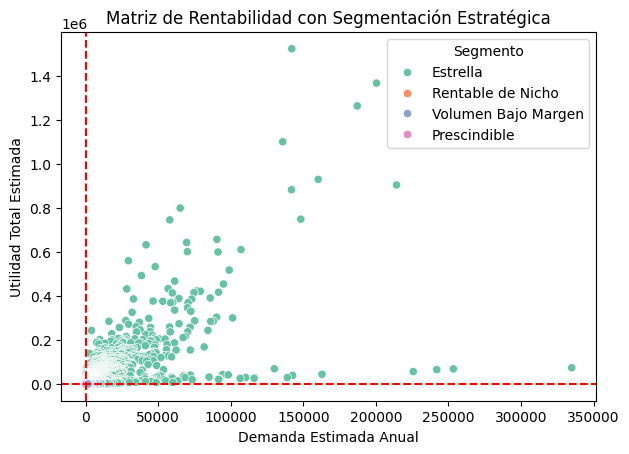

In [33]:
sns.scatterplot(data=resumen_enriquecido, 
                x='Demanda_Estimada', 
                y='Utilidad_Total', 
                hue='Segmento_Rentabilidad',
                palette='Set2')
plt.axvline(mediana_demanda, color='red', linestyle='--')
plt.axhline(mediana_utilidad, color='red', linestyle='--')
plt.title('Matriz de Rentabilidad con Segmentación Estratégica')
plt.xlabel('Demanda Estimada Anual')
plt.ylabel('Utilidad Total Estimada')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()


In [34]:
# Filtrar productos del segmento prescindible con baja demanda y baja utilidad
productos_a_eliminar = resumen_enriquecido[
    (resumen_enriquecido['Segmento_Rentabilidad'] == 'Prescindible') &
    (resumen_enriquecido['Utilidad_Total'] <= 0)
]

# Ver algunos ejemplos
productos_a_eliminar[['Producto_ID', 'Nombre_Producto', 'Demanda_Estimada', 'Utilidad_Total']]


,Producto_ID,Nombre_Producto,Demanda_Estimada,Utilidad_Total


In [35]:
(resumen_enriquecido['Segmento_Rentabilidad'] == 'Prescindible') & (resumen_enriquecido['Utilidad_Total'] <= 0)


570     False
2143    False
3181    False
1719    False
1632    False
        ...  
1977    False
1766    False
1247    False
2499    False
921     False
Length: 10590, dtype: bool

In [36]:
resumen_enriquecido['Segmento_Rentabilidad'].value_counts()


Segmento_Rentabilidad
Estrella               4866
Prescindible           4865
Volumen Bajo Margen     430
Rentable de Nicho       429
Name: count, dtype: int64

In [37]:
(resumen_enriquecido['Utilidad_Total'] <= 0).sum()


np.int64(1)

In [38]:
resumen_enriquecido[resumen_enriquecido['Segmento_Rentabilidad'] == 'Prescindible'].sort_values('Utilidad_Total')


,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,Stock_Optimo_Mensual,Precio_Venta,Costo_Unitario,Clasificacion,Utilidad_Unit,Utilidad_Total,Porcentaje_Utilidad,Porcentaje_Acumulado,Clasificacion_ABC,Segmento_Rentabilidad
2499,5287,DR MCGILLICUDDY'S VANILLA,2.0,0.0,0.0,2,0,0,0,0,0.49,0.38,1,0.11,0.22,1.529609e-09,1.000000,C,Prescindible
1247,2773,REVEL STOKE ROASTED PECAN,1.0,0.0,0.0,1,0,0,0,0,0.99,0.72,1,0.27,0.27,1.877248e-09,1.000000,C,Prescindible
1977,3933,NEW AMSTERDAM VODKA,2.0,0.0,0.0,2,0,0,0,0,0.99,0.73,1,0.26,0.52,3.615440e-09,1.000000,C,Prescindible
1766,3623,SPUD POTATO VODKA,2.0,0.0,0.0,2,0,0,0,0,0.99,0.73,1,0.26,0.52,3.615440e-09,1.000000,C,Prescindible
896,2134,CANADIAN LTD,1.0,0.0,0.0,1,0,0,0,0,2.49,1.93,1,0.56,0.56,3.893551e-09,1.000000,C,Prescindible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2911,ARDBEG DARK COVE COM RELEASE,0.0,3.0,69.0,66,6,1,2,8,109.99,82.08,1,27.91,1842.06,1.280742e-05,0.983167,C,Prescindible
7113,23400,PICO & VINE CAB SVGN NAPA,138.0,0.0,18.0,156,13,3,5,18,18.99,7.14,2,11.85,1848.60,1.285289e-05,0.983091,C,Prescindible
6170,21105,KEN VOLK PNT NR CUVEE ST MAR,242.0,215.0,151.0,178,15,4,6,21,29.99,19.60,2,10.39,1849.42,1.285859e-05,0.983065,C,Prescindible
9853,39977,LITTLE PENGUIN CAB SVGN AUSL,57.0,88.0,258.0,227,19,5,8,27,14.99,6.84,2,8.15,1850.05,1.286297e-05,0.983039,C,Prescindible


In [39]:
# Opción más amplia: utilidad baja y demanda baja (independientemente del segmento)
productos_baja_rentabilidad = resumen_enriquecido[
    (resumen_enriquecido['Demanda_Estimada'] < 10) &
    (resumen_enriquecido['Utilidad_Total'] < 100)
]
productos_baja_rentabilidad.head()

,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,Stock_Optimo_Mensual,Precio_Venta,Costo_Unitario,Clasificacion,Utilidad_Unit,Utilidad_Total,Porcentaje_Utilidad,Porcentaje_Acumulado,Clasificacion_ABC,Segmento_Rentabilidad
2762,6166,CASA NOBLE X ANEJO C SANTANA,0.0,4.0,5.0,1,0,0,0,0,399.99,300.74,1,99.25,99.25,6.900624e-07,0.999545,C,Prescindible
5438,19060,CHATEAU DALEM 10 FRONSAC,9.0,0.0,0.0,9,1,0,0,1,34.99,23.97,2,11.02,99.18,6.895757e-07,0.999546,C,Prescindible
6141,21026,ROTARI TRENTO BRUT,7.0,0.0,0.0,7,1,0,0,1,18.99,4.90,2,14.09,98.63,6.857517e-07,0.999548,C,Prescindible
8780,27267,KRUPPS THE WATER WITCH RED,0.0,32.0,36.0,4,0,0,0,0,70.99,46.70,2,24.29,97.16,6.755311e-07,0.999555,C,Prescindible
6769,22664,B & G SANCERRE SVGN BL,0.0,3.0,12.0,9,1,0,0,1,27.99,17.21,2,10.78,97.02,6.745577e-07,0.999556,C,Prescindible


## Calculo de  tiempo de entrega y Punto de Reorden (ROP)

In [40]:
# Asegúrate de tener las fechas en formato datetime
dt_detalles['Fecha_Compra'] = pd.to_datetime(dt_detalles['Fecha_Compra'], errors='coerce')
dt_detalles['Fecha_Ingreso'] = pd.to_datetime(dt_detalles['Fecha_Ingreso'], errors='coerce')

# Calcular Lead Time (días entre compra e ingreso)
dt_detalles['Lead_Time'] = (dt_detalles['Fecha_Ingreso'] - dt_detalles['Fecha_Compra']).dt.days

# Lead time promedio por producto
leadtime_promedio = dt_detalles.groupby('Producto_ID')['Lead_Time'].mean().reset_index()
leadtime_promedio.rename(columns={'Lead_Time': 'LeadTime_Promedio_Dias'}, inplace=True)

# 🔄 Resetear índice si fuera necesario
resumen_enriquecido = resumen_enriquecido.reset_index()

# Unir al resumen enriquecido
resumen_enriquecido = resumen_enriquecido.merge(leadtime_promedio, on='Producto_ID', how='left')

# Convertimos el lead time a meses
resumen_enriquecido['LeadTime_Meses'] = resumen_enriquecido['LeadTime_Promedio_Dias'] / 30

# Calculamos el ROP mensual
resumen_enriquecido['ROP'] = (
    resumen_enriquecido['Demanda_Mensual_Promedio'] * resumen_enriquecido['LeadTime_Meses']
) + resumen_enriquecido['Stock_Seguridad']

# Redondeamos
resumen_enriquecido['ROP'] = resumen_enriquecido['ROP'].round().fillna(0).astype(int)



In [41]:
resumen_enriquecido.head()

,index,Producto_ID,Nombre_Producto,Existencia_Inicial,Existencia_Final,Compras_Año,Demanda_Estimada,Demanda_Mensual_Promedio,Desviacion_Estandar,Stock_Seguridad,...,Clasificacion,Utilidad_Unit,Utilidad_Total,Porcentaje_Utilidad,Porcentaje_Acumulado,Clasificacion_ABC,Segmento_Rentabilidad,LeadTime_Promedio_Dias,LeadTime_Meses,ROP
0,570,1233,JACK DANIELS NO 7 BLACK,12016.0,15047.0,145080.0,142049,11837,2959,4883,...,1,10.72,1522765.28,0.010587,0.010587,A,Estrella,7.442588,0.248086,7820
1,2143,4261,CAPT MORGAN SPICED RUM,15499.0,16769.0,201682.0,200412,16701,4175,6889,...,1,6.82,1366809.84,0.009503,0.020091,A,Estrella,7.343519,0.244784,10977
2,3181,8068,ABSOLUT 80 PROOF,15341.0,15608.0,187407.0,187140,15595,3899,6433,...,1,6.75,1263195.00,0.008783,0.028873,A,Estrella,7.385107,0.246170,10272
3,1719,3545,KETEL ONE VODKA,14499.0,16770.0,138109.0,135838,11320,2830,4669,...,1,8.10,1100287.80,0.007650,0.036523,A,Estrella,7.364685,0.245490,7448
4,1632,3405,TITO'S HANDMADE VODKA,8477.0,12268.0,164038.0,160247,13354,3338,5508,...,1,5.80,929432.60,0.006462,0.042985,A,Estrella,7.557793,0.251926,8872


In [42]:
resumen_enriquecido.to_csv('resumen_inventario_final.csv', index=False)